# 04. CDA(Confirmatory Data Analysis)

* writer : rayleigh kim  
**잠깐, 원래 데이터를 벗어난 실습을 하고 옵니다.**

## 이번 실습을 통해서 우리는

1. Comparative Type Test를 배웁니다.  
    ① T-Test를 배웁니다.  
    ② Anova를 배웁니다.  
    ③ '실제' 어떤식으로 하는지 팁을 배웁니다.  
* Associative Type Test를 배웁니다.  
    ① Correlation Coefficient를 관찰하고, p-value도 구해봅니다.  
    ② Chi-squared Test를 해봅니다.  
* EDA 에서, 가설검정의 기술을 빌려와 판단하는 방법을 익힙니다.



### Confirmatory data analysis Review

1. 가설 검정의 '테크닉'자체는 데이터로 부터 어떤 현상이 '우연'인지 그렇지는 않은지를 서술하기 위함입니다.
2. 그 데이터가 과거 데이터인지, 최근 데이터인지, 새롭게 수집한 데이터인지에 따라서 재현성의 의미가 달라집니다.
3. 가설 확인을 위해 '새롭게 수집한 데이터 위에서 재현성 확인을 하는 것'이 진짜 CDA입니다.

**하지만, 우리는 이번 실습을 통해 <U>가설검정 테크닉</U>을 우선 배웁니다.**

먼저 필요한 라이브러리를 모두 가져옵시다.

In [1]:
import scipy.stats as spst
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 유효샘플 사이즈에 대하여...
시작하기 전에 대한 간단한 시뮬레이션을 통해 유효샘플 사이즈에 대해 살펴보려고 합니다.

① 600개의 임의의 값(모집단)을 구성합니다.

In [2]:
#평균이 5.5에 근사하도록 구성
np.random.seed(2019)
people_from_B = np.random.normal(loc = 5, scale = 2, size = 600) \
                            + np.random.uniform(size = 600)

랜덤 샘플링(numpy.random)과 관련된 설명은 [여기](https://rfriend.tistory.com/284) 에 잘 되어 있습니다.

In [3]:
# 아래코드는 당연히 전체(모집단)의 평균은 5.5에 가까울 것입니다. 
# 그러나 우리는 모집단의 분포와 평균을 모른다고 가정해야 합니다.
# 그러므로 적당한 크기(갯수)로 구성된 샘플들 의 평균을 통해 모집단의 평균을 추론해볼 수 있습니다.
people_from_B.mean()

5.477600661767645

② 실험은 1~100차까지 진행합니다.
  * 각 차수마다 30회를 반복해서 샘플링 합니다.
  * 샘플 개수는 1차때는 1개,........10차는 10개,.........100차는 100개를 추출(샘플링)합니다.
  * 각 샘플링한 값들의 평균을 저장합니다.

In [4]:
trial = []
sample_size = []
sample_mean = []

for i in range (1, 101) :
    for j in range(1,31) :
        trial.append('{}차 실험_{}회'.format(i,j))
        sample_size.append(i)
        temp = np.random.choice(people_from_B, size = i, replace = False)
        sample_mean.append(temp.mean())
        
df_vz = pd.DataFrame({'trial' : trial,
                                     'sample_size' : sample_size,
                                     'sample_mean' : sample_mean})

In [5]:
# 저장된 값을 몇개만 살펴봅시다.
df_vz.head(100)

,trial,sample_size,sample_mean
0,1차 실험_1회,1,3.725014
1,1차 실험_2회,1,4.377617
2,1차 실험_3회,1,7.858824
3,1차 실험_4회,1,3.027112
4,1차 실험_5회,1,6.920331
5,1차 실험_6회,1,5.107692
6,1차 실험_7회,1,7.494300
7,1차 실험_8회,1,4.352693
8,1차 실험_9회,1,3.137153
9,1차 실험_10회,1,6.409119


③ 샘플의 평균들의 분포를 시각화해 봅시다.

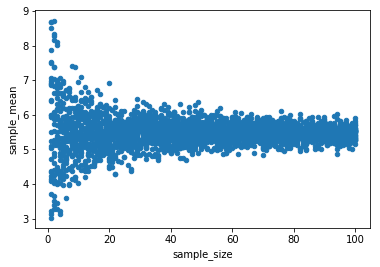

In [6]:
df_vz.plot(kind= 'scatter', x='sample_size', y ='sample_mean')
plt.show()

샘플 평균들의 평균과 표준편차를 구해서 시각화해 보면

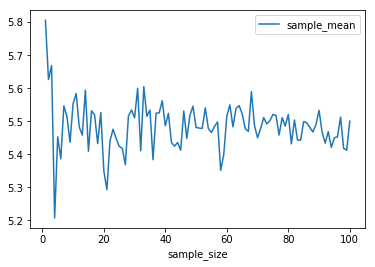

In [8]:
df_mean = df_vz.groupby('sample_size', as_index = False)[['sample_mean']].mean()
df_mean.plot(kind= 'line', x='sample_size', y ='sample_mean')
plt.show()

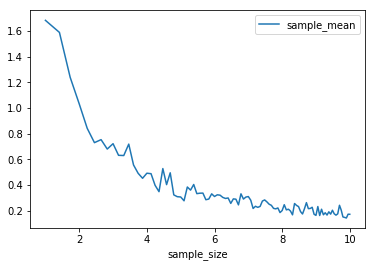

In [9]:
df_std = df_vz.groupby('sample_size', as_index = False)[['sample_mean']].std()
df_std.plot(kind= 'line', x='sample_size', y ='sample_mean')
plt.show()

## 1. Comparative Type Test

### ① T-test

 * 우리는 데이터가 너무 부족한 경우는 다루지 않는다.
 * 샘플 사이즈가 30개 쯤 넘어가면 T-test는 Z-test와 차이가 없어진다. 그러니 T-Test만 이용한다. 

### Case1. One-sample t-test
**상황**  
* A채널의 배너를 클릭하여 들어오는 고객님들의 평균 지출 금액은 5만원이다.
* A채널의 디자인에서 브랜드의 배너가 잘 눈에 띄지 않는 것 같아서, 기각 했던 예전의 배너 B를 올리려 한다.
* B배너는 색감이 강렬한 편이다. 과연 효과가 있을까?

**가정**
* B배너를 이용하면, 고객님들의 평균 지출 금액이 5만5천원 정도로 향상 될 것으로 기대되지만 우리는 그 사실을 모른다.
* 그래서 시뮬레이션 할 예정
* 하루에 약 10명 정도 배너를 클릭해준다. B로 바꿔도 그렇다고 하자.
* 앞으로 A채널에 배너를 달 수 있는 기간은 60일 동안이다.


**귀무 가설 : B배너로 해도 평균 지출 금액 5만원**<br>
**대립 가설 : B배너로 하면 지금 보단 나을 듯.**<br>

In [10]:
# 60일 총 600명에 대한 모집단을 임의로 만들어서 저장합니다.
np.random.seed(2019)
# mean_spent = 5.5
people_from_B = np.random.normal(loc = 5, scale = 2, size = 600) \
                            + np.random.uniform(size = 600)

In [12]:
# 당연하게도, 600명 전체를 대상으로 하면, 대립 가설이 맞다고 나온다.
# spst.ttest_1samp(대립가설, 귀무가설)
spst.ttest_1samp(people_from_B, popmean = 5)


Ttest_1sampResult(statistic=5.810272049873847, pvalue=1.013619414110334e-08)

**pvalue** : 1.013619414110334e-08 라는 뜻은, 1이 소수점 아래 8번째 부터 등장한다는 것이다.

* 정직한 설명 : 귀무가설이 참이라는 전제하에 이렇게 데이터가 관찰될 확률이 0.0....01%정도라는 뜻이다.
* 발칙한 설명 : 기존 배너보다 나을 확률이 99%를 넘는다는 뜻이다.

Chance to Beal Original을 검색하여 공부해보자.  기본 공식은 1-pvalue이다. 대립가설이 옳을 확률

**statistic** : 5.810272049873847  
* 신호/노이즈가 5.8, 즉 신호가 노이즈보다 5.8배 높다는 뜻

하지만, 우리는 전체 데이터가 없다. 전체 데이터를 수집하려면 B배너를 달고 60일 동안 있어야 하는데,
우리는 B배너를 달지 말지 고민해야 하는 단계 이다. 데이터가 없다!

그래서 '샘플링'해서 시뮬레이션을 시도하고,  
T-test해보자.

**실습T1**

1. 하루만 실험해서 T-test의 결과를 확인해보자. (위에서 언급했듯이 하루에 10명만 클릭한다고 가정했다.)
2. 2일, 3일, 4일 실험해서 T-test의 결과를 확인해보자.

1,2를 여러번 반복해보자. 실험계획을 해야 한다면, B배너를 실험적으로 며칠이나 노출시켜 보겠는가?

In [28]:
# np.random.choice를 이용하여 추출하고,
a = np.random.choice( people_from_B , 10,replace= False)
a

array([3.13715257, 7.92188336, 4.1166032 , 4.6395563 , 8.56255264,
       6.29681041, 6.56767306, 4.30687408, 1.09390671, 6.56021974])

In [34]:
# spst.ttest_1samp 를 이용하여 one-sample T-test를 수행해 봅시다.
spst.ttest_1samp(a, popmean = 5)


Ttest_1sampResult(statistic=0.7251475088200434, pvalue=0.48678659836792104)

In [44]:
b = []
for i in range(10):
    a = np.random.choice( people_from_B , 200,replace= False)
    b.append(spst.ttest_1samp(a, popmean = 5)[1])
print(b)

[0.02835693914672027, 0.014215676516852549, 0.0017438390105461539, 0.07438371432325609, 0.0001830342669139709, 0.06364642459226752, 0.01551254317092901, 0.00010446921891312847, 0.003474963631092969, 0.0020268119698778875]


### Case2. Two-sample t-test

홈페이지 구축 중에, 메뉴 디자인A와 B를 두고 논쟁이 일어났다.
고객에게 맡기자!

**가정**
* A디자인을 이용하면, 고객님들 중 20%는 클릭해준다.(아직은 모른다)
* B디자인을 이용하면, 고객님들 중 25%는 클릭해준다.(역시 아직은 모른다)
* 그래서 시뮬레이션 할 예정
* 하루에 약 100명 정도 홈페이지를 방문해준다.(아직 초창기다.)

**귀무 가설 : A, B 어떤 디자인이어도 CTR은 같다.**<br>
**대립 가설 : CTR은 A, B냐에 따라 차이가 있을 것이다.**<br>

In [111]:
np.random.seed(2019)
# 역시 아래는 모집단을 만든 것으로 우리는 CTR를 모른다고 가정한다.
people_from_A = np.random.binomial(1, 0.2, size=10000)
people_from_B = np.random.binomial(1, 0.25, size=10000)

In [112]:
people_from_A

array([25, 19, 21, ..., 20, 20, 25])

**조건이 있다.**
* 위에서 만든 데이터 A와 B의 인덱스 번호가 같으면 같은 사람이다.
* 그리고 한 사람은 A 혹은 B 둘 중 하나의 디자인만 볼 수 있다.

In [52]:
# 당연하게도 전체를 대상으로 하면, 대립 가설이 맞다고 나온다.
# 그런데 그런 데이터는 얻을 수도 없다. 
# 또한 한 사람이 동시에 A와 B를 보고 있을 수는 없기에 아래 test는 부적절하다.

spst.ttest_ind(people_from_A, people_from_B, equal_var=False)

Ttest_indResult(statistic=-8.566294220690699, pvalue=1.1454883039955057e-17)

샘플링하여 T-test 해보자.


**실습T2**

1. 하루만 실험해서 T-test의 결과를 확인해보자.
2. 2일, 3일, 4일 실험해서 T-test의 결과를 확인해보자.

1,2를 여러번 반복해보자. 실험계획을 해야 한다면, B배너를 실험적으로 며칠이나 노출시켜 보겠는가?

In [54]:
# 하루에 100명 방문하므로
# 1~10000 사이에서 100개의 인덱스(회원번호, 사람번호 등 의미)를 추출하자.
idx = np.random.choice(10000, 100, replace = False)
idx

array([6534, 4722, 3936, 6160,  502, 5365, 1643, 7714, 2306, 9847, 1157,
         73, 3115, 2718,  697,  457, 1986, 7268, 7916, 6497, 7856, 8256,
       1552, 9270, 9757, 7726, 6258, 4454, 6858, 5608, 2868, 1178, 8434,
       5743, 7719, 6580,  340, 3671, 4996, 2881, 4703, 1864, 4766,  768,
       2777, 2352, 5264, 1532, 8249, 2751, 4823, 8263, 6223, 4207,   72,
       8485,  613, 1470, 7764, 5602, 7493, 9891, 7835, 5091, 7007, 5230,
       4496, 1742, 8239, 6118, 3432, 1750, 9056, 3565, 5192, 5755, 4791,
       1075, 3917, 9680, 8757, 9934, 7024, 8855, 5240, 2762, 3839, 5791,
       2545, 1369,  819, 4977, 4694, 5434, 2052, 3771, 2124, 8010, 2483,
        147])

In [59]:
# 위에서 추출된 100개의 번호(인덱스)를 무작위로 A와 B 배너쪽에 할당하자.
# 위에서 추출한 방식 자체가 무작위추출이므로 100개의 번호 순서도 무작위로 되어 있다.
# 그러므로 그냥 반을 나누서 idx[:50]는 A, idx[50:]는 B에 할당하면 된다.
aa = []
for i in range(30):
    idx = np.random.choice(10000, 500, replace = False)
    aa.append(spst.ttest_ind(people_from_A[idx[:50]], people_from_B[idx[50:]], equal_var=False)[1])
aa  

[0.08715653867975878,
 0.24712790928233924,
 0.8403041297190446,
 0.6066687124767951,
 0.9451176279400672,
 0.06380792965741292,
 0.5606464000417997,
 0.3672652921073881,
 0.13510934354007395,
 0.49491695608630204,
 0.017488202738818813,
 0.14788388278634026,
 0.20892575422764464,
 0.6138086266611775,
 0.2373686080172734,
 0.11863897391517611,
 0.7427133660863092,
 0.6973378920333706,
 0.9716843353358128,
 0.06290257306464986,
 0.7834751302961418,
 0.057832432027536455,
 0.5592090484987853,
 0.24712790928233924,
 0.7770199441439763,
 0.08536145339743376,
 0.3452941663757165,
 0.4029722987948504,
 0.07204089521540441,
 0.03418439061909884]

In [ ]:
# A와 B로 부터 추출한 리스트(0 혹은 1로 구성된)로 2 sample T test를 수행해보자.



In [ ]:
# 위 실습의 샘플 크기를 1일에서 2~4일로 늘려가며 테스트해보자


### Case3. Paired t-test

에스케이 피트니스 센터에서 단 1주일 만에 체중을 감량시키는 훈련 프로그램을 개발하였습니다.  
이 훈련 프로그램에 참여한 회원 30명에 대해서 참여 전 몸무게와 참여 후 몸무게를 측정하였습니다.

**귀무 가설 : 참여 전과 후의 몸무게는 같다.**(3일 다이어트 훈련 프로그램이라니!!)<br>
**대립 가설 : 참여 전과 후의 몸무게에 차이가 있을 것이다.**<br>

Paired T-Test는, 각각의 데이터가 서로 관련이 있을 경우(같은 인덱스의 값이 동일인 인 경우) 사용할 수 있습니다.  

여기는 먼저 코드를 감상합시다.

In [113]:
np.random.seed(2019)

before = np.random.normal(80, 10, 30)
after = before + np.random.uniform(-10,3, 30)

In [116]:
weight =pd.DataFrame({'before':before, 'after':after})

In [117]:
weight

,before,after
0,77.823210,71.781501
1,88.214554,80.134135
2,94.812778,92.272419
3,93.318640,94.544882
4,76.381346,70.584239
5,86.856088,80.439531
6,85.737614,84.606050
7,82.877277,75.365559
8,77.643657,75.196976
9,89.534902,90.748160


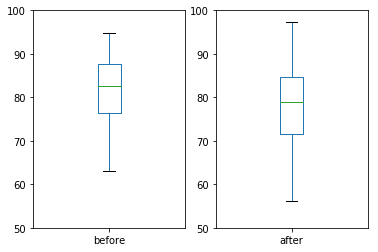

In [118]:
plt.subplot(1,2,1)
weight['before'].plot(kind = 'box', ylim = (50,100))

plt.subplot(1,2,2)
weight['after'].plot(kind = 'box', ylim = (50,100))

In [119]:
weight['diff'] = weight['before'] - weight['after']

In [120]:
spst.ttest_rel(before, after) # 얘가 Paried t-test

Ttest_relResult(statistic=5.755395332208213, pvalue=3.1221904501479888e-06)

In [121]:
spst.ttest_ind(before, after, equal_var=False) # Two sample test

Ttest_indResult(statistic=1.2480434943647793, pvalue=0.2170501234846975)

In [122]:
spst.ttest_1samp(weight['diff'], popmean = 0) # One sample test

Ttest_1sampResult(statistic=5.755395332208213, pvalue=3.1221904501479888e-06)

In [123]:
before.mean() - after.mean()

3.5173255495705575

#### 실습 T3

In [ ]:
# Q1. paired t-test시, pvalue는?



In [ ]:
# Q2. two-sample t-test시, pvalue는?



In [ ]:
# Q3. 결과가 어떻게 다른가, 어디를 신뢰해야 하는가?



In [ ]:
# Q4. before와 after 각각의 평균과 표준편차를 구해보자. 그리고, 시각화 하여 비교해보자.



In [ ]:
# Q5. before - after로 계산된 diff(체중증감) 변수를 추가하고, diff의 평균과 표준편차를 구해보자. 
# 그리고 시각화 해 보자.



In [ ]:
# Q6. 다시, 어떤 테스트가 더 합당한가?



### Case4. Analysis of Variance (ANOVA)


나에게 주어진 예산은 300만원<br>
내 눈 앞에는 슬롯머신이 3대<br>
가장 돈을 많이 벌 것 같은 슬롯머신을 찾고 싶은데...


**가정**
* 한번 땡길때 마다 1000원이 든다.
* A머신을 이용하면, 9% 확률로 10000원을 번다.(아직 모른다)
* B머신을 이용하면, 10% 확률로 10000원을 번다.(아직 모른다)
* C머신을 이용하면, 8% 확률로 10000원을 번다.(아직 모른다)
* 머신당 10만원을 사용하여 실험해보기로 하자!

**사용 금액 대비 얻게 될 금액의 기댓값을 구해보는 것도 재미있을 것이다.**<br>


다음, 귀무가설과 대립가설의 구조를 '정확히'이해하자.

**귀무가설 : A,B,C 다 똑같다**  
**대립가설 : A,B,C 중 '무언가 하나는' 다를 것이다.**

대립가설 조심, A, B, C 중 뭐가 다르고, 얼마나 다르고 등은 전혀 알 수 없다. 따로 계산해야 한다.

In [70]:
np.random.seed(2019)

a_machine = np.random.binomial(1, 0.09, 3000)*10000
b_machine = np.random.binomial(1, 0.10, 3000)*10000
c_machine = np.random.binomial(1, 0.08, 3000)*10000

In [71]:
a_machine[:20]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0, 10000,     0,     0,
           0,     0])

In [74]:
b_machine[:20]

array([    0,     0,     0,     0, 10000,     0,     0,     0,     0,
           0, 10000,     0,     0,     0,     0,     0,     0,     0,
           0,     0])

In [75]:
c_machine[:20]

array([    0,     0,     0,     0, 10000,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
       10000,     0])

In [72]:
spst.f_oneway(a_machine, b_machine, c_machine)

F_onewayResult(statistic=3.98971736112853, pvalue=0.018537692867904416)

##### 정석적인 해석 : 귀무가설이 참일 때, 이러한 데이터가 관측될 확률은 1.85% 정도이다. (1.85%확률을 뚫고 이런 데이터가 관측될 수도 있다.)

발칙한 해석 : 뭔가 하나는 차이가 날 확률이 98%는 넘는다.

물론 이건, 각각 3000번씩 시도 해본 것을 바탕으로 한 실험이다. 한정된 예산으로는 그럴 수 없다.<br>

#### 실습 T4

In [144]:
# Q1. 각 머신당 100번씩만 샘플링하여, ANOVA 테스트를 해보자.  
# 여기서 a,b,c_machine 의 데이터는 개별 사건이라고 가정하자.
a_result = []
for i in range(30):
    
    a_sample = np.random.choice(a_machine, 100, replace = False)
    b_sample = np.random.choice(b_machine, 100, replace = False)
    c_sample = np.random.choice(c_machine, 100, replace = False)
    a_result.append(spst.f_oneway(a_sample, b_sample, c_sample)[1])
a_result

[0.20601585781914053,
 0.823351761822104,
 0.886097450236745,
 0.11260570625168713,
 0.07727318679738533,
 0.583319301548128,
 0.6436159109767976,
 0.021427116644023938,
 0.8740900940908658,
 0.6161250320128815,
 0.7115442198611102,
 0.5696890350731332,
 0.6131528990719195,
 0.11859606950904387,
 0.6289343136458166,
 0.7990591672368319,
 0.9525915197893221,
 0.49186171750588126,
 0.29684258809498476,
 0.37799941618327204,
 0.5455878489927972,
 0.6487131359517022,
 0.11859606950904387,
 0.6675894554827317,
 0.20601585781914053,
 0.2695341801159247,
 0.6771176759196738,
 0.03726244905875417,
 0.2202310615769866,
 0.6018022637830637]

In [91]:
# Q2. 각 머신의 결과를 평균과 표준편차로 요약해보자.  
print(a_sample.mean(), a_sample.std())
print(b_sample.mean(), b_sample.std())
print(c_sample.mean(), c_sample.std())


700.0 2551.4701644346146
600.0 2374.8684174075834
1100.0 3128.897569432403


In [ ]:
# Q3. 의사결정을 해보자. 어떤 머신에 나머지 돈을 all-in 할 것인가?



In [ ]:
# Q4. 머신당 얼마 씩을 사용하면, 의사결정 할 수 있을까? 
# 20, 30, 40 만원씩으로 금액을 늘려서 테스트 해보자.(위 Q1~3 반복)


In [ ]:
# Q5. Q1과 Q2를 확인한 후, 이제 머신별로 동일한 금액을 투입하지 말고, 
# 다른 금액을 투입하여 테스트해 봅시다.  
# 한번 실험시 총 금액 30만원은 고정입니다.
# 예를 들어, A머신은 12만원, B는 8만원, C는 10만원
# 실험을 10회 진행하며 각 실험마다 머신당 투입 금액은 변화를 주세요.







**Tip1. 비교할 그룹이 많다면...**
1. 원래 실험계획이란 항상 실험군과 대조군(비교군)을 두어야 한다.
    * 실험군이란, 우리가 무언가 조작을 한 것이다.
    * 대조군이란, 비교를 위해 두는 '기존'의 무언가이다. 조작을 하지 않는다.
2. 그래서 사실, 대조군에 비해 좋은 것을 선택하는 게임이다.
3. 그래서 사실, 대조군에 비해 좋은 것들 중 가장 우월한 것을 선택하는 게임이다.

**결론 : 대조군vs하나의실험군 으로 t-test를 여러번하고, 얼마나 차이나는지 비교하라**

**Tip2. Factor가 너무 많다면..**
1. 하나의 Factor로 조합을 만들어라. 선택이 문제다.
2. 상호작용을 해석해야하는 '연구'라면 이제 실험계획법을 공부해야 한다.
Two-way Anova이상의 기법들을 익혀야 한다.


## 2. Associative Type Test

### Correlation Coefficient

가상의 데이터를 만들어 실험할 예정이다.

1. 따로 X와 Y를 시각화 해보길 권장한다.
2. 코드는 관람용

**귀무가설 : X와 Y는 상관이 없다.(상관계수 = 0)**  
**대립가설 : 상관계수가 0이 아니다.**



In [92]:
np.random.seed(2019)

X = np.random.uniform(0, 1000, 100)
Y = X*2 + np.random.normal(1000, 700,100)

In [93]:
spst.pearsonr(X, Y)

(0.5907805070828732, 9.790270530287175e-11)

결과는 튜플로 나오는데

1. 튜플의 첫 번째 값 : 상관계수를 뜻한다.
2. p-value가 어색할 수 있다. 다음과 같은 구조하에 진행된 테스트이다.
    * 귀무가설 : 상관 계수가 0이다.
    * 대립가설 : 상관 계수가 0이 아니다.
3. 즉, 상관계수는 선형성의 정도를 이야기한다. p-value는 상관계수가 우연에 의해 일어나진 않았는지 판단한다.

### Chisquare_test

티셔츠 구매여부와 반바지 구매여부는 관계가.. 있을까?!  
**귀무가설 : 티셔츠 구매와 바지 구매는 별개이다.(독립이다)**  
**대립가설 : 티셔츠를 구매와 바지는 독립이 아니다.관련이 있다..**

여기서도 코드를 살펴보며 결과를 해석해보자.


가상의 데이터를 만들어 테스트 해본다.



In [94]:
np.random.seed(2019)

t_s = np.zeros(1000)
t_p = np.zeros(1000)
data = pd.DataFrame({'shirts' : t_s, 'pants' : t_p})

data.loc[0:314, 'shirts'] = 1
data.loc[0:198, 'pants'] = 1
data.loc[731:,'pants'] = 1

data = data.sample(frac=1).reset_index(drop=True)

data.head(10)

,shirts,pants
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,1.0,1.0
7,1.0,0.0
8,0.0,1.0
9,0.0,1.0


In [95]:
contingency = pd.crosstab(data['shirts'], data['pants'])
contingency

pants,0.0,1.0
shirts,,
0.0,416,269
1.0,116,199


In [96]:
chiresult = spst.chi2_contingency(contingency)

In [97]:
print("카이제곱통계량 : {}".format(chiresult[0]))
print("p-value : {:.20f}".format(chiresult[1]))
print("자유도 : {}".format(chiresult[2]))
print("기대 빈도 : \n", chiresult[3] ) #귀무가설에 대한 기대빈도.

카이제곱통계량 : 48.56721121836466
p-value : 0.00000000000319160978
자유도 : 1
기대 빈도 : 
 [[364.42 320.58]
 [167.58 147.42]]


결과를 해석해보자.

In [101]:
# 기대빈도 분할표에서... 
# ①바지를 구매하지 않은 사람 중 티셔츠 구매비율
chiresult[3][1,0] / (chiresult[3][0,0] + chiresult[3][1,0])

0.315

In [102]:
# ②바지를 구매한 사람 중 티셔츠 구매비율
chiresult[3][1,1] / (chiresult[3][0,1] + chiresult[3][1,1])

0.31499999999999995

① 와 ②가 같다고 기대함 <== 귀무가설에 대한 기대

## EDA에서 가설검정의 테크닉을 쓴다?!

**차이를 비교하는데 있어서는 항상 '두 가지' 관점이 필요하다.**
1. 정말 현실적으로 의미있는 차이인가.
2. 통계적으로도 의미이는 차이인가.

1번 기준으로는 그럴 듯 해보이는 차이가, 2번 기준에서는 '노이즈'에 의한 차이로 판단될 수도 있어서 조심해야 한다.<br>
반대로, 통계적으로는 의미가 있으나, 현실적으로는 너무 의미없는 차이일 수도 있다.

따라서, EDA 중 시각화를 통해 과거 패턴을 확인할 때
1. '눈'으로 볼 뿐 아니라 (현실적인 판단)
2. 통계적으로도 유의미한지 (노이즈에 의한 패턴은 아닌지 = 우연한 패턴은 아닌지)
확인해야 한다. 따라서

## 종합실습!

1. 03.EDA_2.ipynb를 켠다.
2. 모든 Comparative type에 대하여, 가설 검정을 진행한다.
3. 모든 Associative type에 대하여, 상관계수를 구한다.
4. Location과 Price에 대하여, 위에서 실습한 카이제곱 검정을 해본다.